<a href="https://colab.research.google.com/github/bislara/ASL-Handset-Classification/blob/master/Asl_handset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
!ls

drive  sample_data


In [0]:
!mkdir .kaggle

In [0]:
import json

token = {"username":"biswajeetsahoo54","key":"1ce5cac341a71f094959287c3a210236"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [5]:
!cp /content/.kaggle/kaggle.json  /content/.kaggle/kaggle.json

cp: '/content/.kaggle/kaggle.json' and '/content/.kaggle/kaggle.json' are the same file


In [0]:
!cp /content/.kaggle/kaggle.json  /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)  646MB  2020-03-20 23:31:34          20892  
unanimad/dataisbeautiful                                    Reddit - Data is Beautiful                           10MB  2020-03-13 16:34:07            371  
rubenssjr/brasilian-houses-to-rent                          brazilian_houses_to_rent                            117KB  2020-03-15 01:12:22            438  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     381KB  2020-03-21 04:49:37          66817  
kimjihoo/coronavirusdataset                                 Data

In [10]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:14<00:00, 72.5MB/s]
100% 1.03G/1.03G [00:14<00:00, 75.7MB/s]


In [11]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import os
import time

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.ImageFolder(root = "/content/asl_alphabet_train/asl_alphabet_train", transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)


In [0]:
root_path = '/content/asl_alphabet_train/asl_alphabet_train'
file_names = []
dir_names = []
root_names = []
for (root,dirs,files) in os.walk(root_path, topdown=True):
    file_names.append(files)
    dir_names.append(dirs)
    root_names.append(root)

classes = tuple(dir_names[0])


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

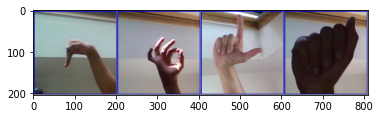

    J     W     Y     A
Input Size is  torch.Size([4, 3, 200, 200])


In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print("Input Size is ",images.size())

In [17]:
print("classes are ",classes)

classes are  ('A', 'S', 'M', 'del', 'V', 'W', 'F', 'G', 'E', 'I', 'X', 'Y', 'Z', 'N', 'C', 'P', 'D', 'Q', 'B', 'T', 'space', 'K', 'U', 'O', 'H', 'R', 'J', 'L', 'nothing')


In [18]:
print(len(classes))

29


In [0]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, in_fea = 3, out_fea = len(classes)):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_fea, 12, 5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv2d(12, 24, 5)
        self.conv3 = nn.Conv2d(24, 36, 5)
        self.fc1 = nn.Linear(36 * 191 * 191, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, out_fea)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        # print("X size is: ",x.size())
        x = x.view(-1, 36 * 191 * 191)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [0]:
#check if cuda available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

#import the model
net = Net()
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  net = nn.DataParallel(net)
net = net.to(device)


In [0]:
step = 0
loss_train = []
loss_val = []
net = net.train()
min_loss = 100
patience = 5
training_loss_store = []
validation_loss_store = []


import torch.optim as optim

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)
file = open('/content/drive/My Drive/Asl_handset/logs_test4_epoch100_with_max_pool.txt', 'w')


In [23]:
print('training started.............................................')
file.write('training started.............................................\n')
start_time = time.time()
for epoch in range(5):  # loop over the dataset multiple times
    file.write('##############################TRAINING###############################\n')
    running_loss = 0.0
    loop_no=0
    loss_epoch=0
    for i, data in enumerate(trainloader, 0):
        step+=1
        loop_no+=1
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device),data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        #print("Input Size is ",inputs.size())
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss_epoch += loss.item()
        loss_train.append(loss.item())
        training_loss_store.append([epoch, loss.item()])
        loss.backward()
        optimizer.step()
        

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 10))
            #log_loss_summary(logger, loss_train, step, prefix = 'train_')
            file.write('epoch = '+ str(epoch + 1) + '\t' +'step = '+ str(step) +'\t'+'train_loss = '+'\t'+str(np.mean(loss_train)) +'\n')
            loss_train = []
            running_loss = 0.0
            
    print('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time))
    file.write('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time) + '\n')
    file.write('##################################evaluation##############################\n')
    print('################################evaluation###########################\n')
    
    val_loss = loss_epoch/float(loop_no)
  
    if val_loss < min_loss:
            min_loss = val_loss
            no_impr_epoch = 0
            
            #save the best model
            torch.save(net.state_dict(), 'training/epoch_' + str(epoch+1) + 'loss_' + str(val_loss) + '.pt')
            
            print('performance improved with validation loss ' + str(val_loss))
            file.write('--------------------------------------------------------------------\n')
            file.write('performance improved with validation loss =  ' + str(val_loss) + '\n')
            
            file.write('epoch = '+ str(epoch + 1) + '\t' +'step = '+ str(step) +'\t'+'val_loss = '+'\t'+str(np.mean(loss_val)) +'\n')
            file.write('--------------------------------------------------------------------\n\n')
            #log_loss_summary(logger, loss_val, step, prefix="val_")
            loss_val = []
    else:
            no_impr_epoch += 1
            print('no improvement with prev best model ' + str(no_impr_epoch) + 'th')
            file.write('no improvement with prev best model ' + str(no_impr_epoch) + 'th \n')
            
    if no_impr_epoch > patience:
            print('stop training')
            file.write('stop training')
            break

print('Finished Training................................................')
file.write('Finished Training................................................\n')
end_time = time.time()
file.write('Training time:- ' + str(end_time - start_time))
file.close()


training started.............................................
[1,    10] loss: 3.352
[1,    20] loss: 3.361
[1,    30] loss: 3.373
[1,    40] loss: 3.351
[1,    50] loss: 3.374
[1,    60] loss: 3.360
[1,    70] loss: 3.392
[1,    80] loss: 3.366
[1,    90] loss: 3.355
[1,   100] loss: 3.351
[1,   110] loss: 3.387
[1,   120] loss: 3.380
[1,   130] loss: 3.395
[1,   140] loss: 3.382
[1,   150] loss: 3.368
[1,   160] loss: 3.376
[1,   170] loss: 3.346
[1,   180] loss: 3.370
[1,   190] loss: 3.408
[1,   200] loss: 3.382
[1,   210] loss: 3.379
[1,   220] loss: 3.351
[1,   230] loss: 3.374
[1,   240] loss: 3.359
[1,   250] loss: 3.347
[1,   260] loss: 3.373
[1,   270] loss: 3.388
[1,   280] loss: 3.403
[1,   290] loss: 3.384
[1,   300] loss: 3.377
[1,   310] loss: 3.368
[1,   320] loss: 3.366
[1,   330] loss: 3.366
[1,   340] loss: 3.367
[1,   350] loss: 3.377
[1,   360] loss: 3.361
[1,   370] loss: 3.367
[1,   380] loss: 3.358
[1,   390] loss: 3.364
[1,   400] loss: 3.359
[1,   410] loss: 3

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
[3, 14950] loss: 0.144
[3, 14960] loss: 0.255
[3, 14970] loss: 0.146
[3, 14980] loss: 0.187
[3, 14990] loss: 0.292
[3, 15000] loss: 0.135
[3, 15010] loss: 0.259
[3, 15020] loss: 0.292
[3, 15030] loss: 0.244
[3, 15040] loss: 0.063
[3, 15050] loss: 0.049
[3, 15060] loss: 0.041
[3, 15070] loss: 0.053
[3, 15080] loss: 0.243
[3, 15090] loss: 0.162
[3, 15100] loss: 0.170
[3, 15110] loss: 0.141
[3, 15120] loss: 0.242
[3, 15130] loss: 0.127
[3, 15140] loss: 0.132
[3, 15150] loss: 0.289
[3, 15160] loss: 0.255
[3, 15170] loss: 0.128
[3, 15180] loss: 0.132
[3, 15190] loss: 0.114
[3, 15200] loss: 0.138
[3, 15210] loss: 0.166
[3, 15220] loss: 0.094
[3, 15230] loss: 0.048
[3, 15240] loss: 0.256
[3, 15250] loss: 0.205
[3, 15260] loss: 0.159
[3, 15270] loss: 0.015
[3, 15280] loss: 0.088
[3, 15290] loss: 0.214
[3, 15300] loss: 0.060
[3, 15310] loss: 0.220
[3, 15320] loss: 0.467
[3, 15330] loss: 0.215
[3, 15340] loss: 0.127
[3, 15350] loss: 0.181
[3, 15

In [0]:
#Release all unoccupied cached memory in GPU
if(torch.cuda.is_available()):
    torch.cuda.empty_cache()


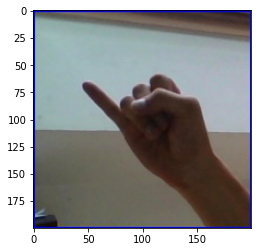

Ground Truth:      A
Predicted:      I


In [41]:
PATH = "training/epoch_5loss_0.07902998019909037.pt"
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

testset = torchvision.datasets.ImageFolder(root = "/content/asl_alphabet_test", transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=1)

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
# print labels
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

# show images
# import os
# print("Actual image is ",os.path.basename("/content/asl_alphabet_test/asl_alphabet_test/B_test.jpg"))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))


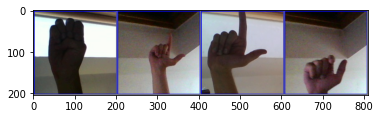

Ground Truth:      V     Y     Y     T
tensor([ 4, 11, 11, 19])
Predicted:      V     Y     Y     T
A :-  11.570852
S :-  24.409851
M :-  4.58274
del :-  14.831625
V :-  27.34398
W :-  13.32489
F :-  4.7965393
G :-  -14.15033
E :-  14.676993
I :-  0.13480337
X :-  22.560686
Y :-  -0.26172882
Z :-  10.12339
N :-  -6.0614476
C :-  6.2105575
P :-  -25.371975
D :-  -28.404472
Q :-  -0.14963302
B :-  1.4069695
T :-  -16.706018
space :-  2.197147
K :-  -4.8883977
U :-  1.8749839
O :-  -1.2305355
H :-  -14.198692
R :-  -18.489193
J :-  -13.128809
L :-  -9.27605
nothing :-  -10.406811


In [43]:
PATH = "training/epoch_5loss_0.07902998019909037.pt"
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


outputs = model(images)
_, predicted = torch.max(outputs, 1)
print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
i = outputs.detach().numpy()
#print('Scores:-', i)
for j in range(len(classes)):
    print(classes[j], ':- ', i[0, j])

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print("Total is ",total)

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Streaming output truncated to the last 5000 lines.
Total is  67012
Total is  67016
Total is  67020
Total is  67024
Total is  67028
Total is  67032
Total is  67036
Total is  67040
Total is  67044
Total is  67048
Total is  67052
Total is  67056
Total is  67060
Total is  67064
Total is  67068
Total is  67072
Total is  67076
Total is  67080
Total is  67084
Total is  67088
Total is  67092
Total is  67096
Total is  67100
Total is  67104
Total is  67108
Total is  67112
Total is  67116
Total is  67120
Total is  67124
Total is  67128
Total is  67132
Total is  67136
Total is  67140
Total is  67144
Total is  67148
Total is  67152
Total is  67156
Total is  67160
Total is  67164
Total is  67168
Total is  67172
Total is  67176
Total is  67180
Total is  67184
Total is  67188
Total is  67192
Total is  67196
Total is  67200
Total is  67204
Total is  67208
Total is  67212
Total is  67216
Total is  67220
Total is  67224
Total is  67228
Total is  67232
Total is  67236
Total is  67240
Total is  67244
Total

In [0]:
class_correct = list(0. for i in range(29))
class_total = list(0. for i in range(29))
with torch.no_grad():
    for data in trainloader:
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
        print(c,labels)
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

#file = open('result_logs.txt', 'w')
for i in range(29):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    #file.write('Accuracy of' + classes[i] + ':' + '\t' + str(100 * class_correct[i] / class_total[i]) +'%'+'\n')
    

tensor([ True, False, False,  True]) tensor([16, 18, 20, 19])
tensor([True, True, True, True]) tensor([12, 19, 10, 26])
tensor([True, True, True, True]) tensor([1, 2, 6, 7])
tensor([ True,  True, False,  True]) tensor([26, 28, 24, 12])
tensor([ True, False,  True,  True]) tensor([ 5, 20,  9,  6])
tensor([ True,  True, False,  True]) tensor([24,  2, 12, 10])
tensor([True, True, True, True]) tensor([21,  0,  2,  9])
tensor([False,  True,  True, False]) tensor([20, 16, 12, 16])
tensor([ True,  True, False, False]) tensor([ 0,  8, 28, 14])
tensor([ True,  True,  True, False]) tensor([15,  3, 14,  6])
tensor([ True, False, False,  True]) tensor([ 4, 16,  4,  7])
tensor([False,  True,  True,  True]) tensor([18,  3, 15, 10])
tensor([True, True, True, True]) tensor([ 1, 25,  1, 16])
tensor([True, True, True, True]) tensor([ 5, 25, 14, 26])
tensor([ True,  True,  True, False]) tensor([28, 23, 23, 24])
tensor([False,  True, False,  True]) tensor([12, 13, 16, 27])
tensor([True, True, True, True])

KeyboardInterrupt: ignored

In [0]:
file.close()